<a href="https://colab.research.google.com/github/vivekshaoutlook/machine_learning/blob/master/08_Categorical_tutorial_Kaggle_I_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype #(instead of using OrdinalEncoder())

In [0]:
import string

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/catg1_train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/catg1_test.csv")

In [6]:
print(df_train.shape)
print(df_test.shape)


(300000, 25)
(200000, 24)


In [7]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
id        300000 non-null int64
bin_0     300000 non-null int64
bin_1     300000 non-null int64
bin_2     300000 non-null int64
bin_3     300000 non-null object
bin_4     300000 non-null object
nom_0     300000 non-null object
nom_1     300000 non-null object
nom_2     300000 non-null object
nom_3     300000 non-null object
nom_4     300000 non-null object
nom_5     300000 non-null object
nom_6     300000 non-null object
nom_7     300000 non-null object
nom_8     300000 non-null object
nom_9     300000 non-null object
ord_0     300000 non-null int64
ord_1     300000 non-null object
ord_2     300000 non-null object
ord_3     300000 non-null object
ord_4     300000 non-null object
ord_5     300000 non-null object
day       300000 non-null int64
month     300000 non-null int64
target    300000 non-null int64
dtypes: int64(8), object(17)
memory usage: 57.2+ MB


In [0]:
X=df_train.drop(["target"],axis=1)
y=df_train["target"]

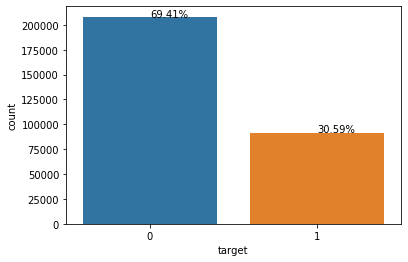

In [10]:
ax = sns.countplot(x=y)

#below code is for plotting the %ge value on the top of the bars
target_count_0 = df_train[df_train["target"]==0].shape[0]
target_count_1 = df_train[df_train["target"]==1].shape[0]
target_count_total = target_count_0+target_count_1
target_count = [target_count_0,target_count_1]


for i,p in enumerate(ax.patches):
  p_height = p.get_height()
  p_center = p.get_x()+p.get_width()/2
  ax.text(p_center,p_height,"{:1.2f}%".format(target_count[i]*100/target_count_total))
  


**1.Analysis and Encoding of Binary categoricals**

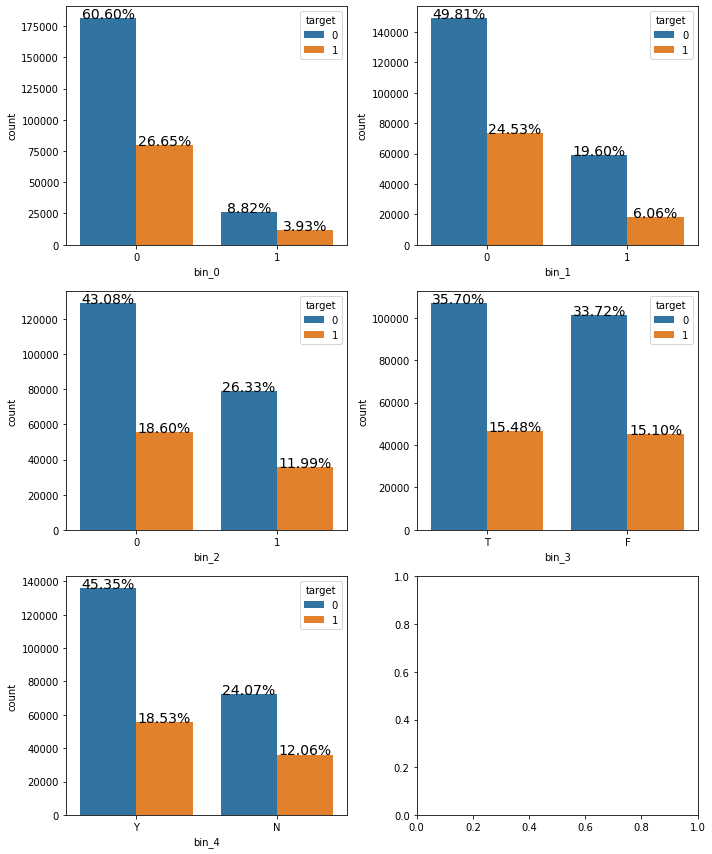

In [11]:

def print_percentage(ax,total):
  for p in ax.patches: # loop to all objects
        height = p.get_height()        
        ax.text(p.get_x()+p.get_width()/2,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
        #ax.set_ylim(0,height)


bin_cols=[['bin_0', 'bin_1'], ['bin_2', 'bin_3'], ['bin_4']]#keeping it 2d becasue the "axes" below is 2d
#grid = sns.FacetGrid(df_train,hue="target")
#grid = gspec.GridSpec(3,2)
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(10,12))
#print(axes)
for index in range(len(bin_cols)):  
     try:
        total = len(df_train)
        ax = plt.subplot(axes[index][0])# required for feeding the figure of grid, even though ax is not used
        sns.countplot(x=bin_cols[index][0],data=df_train,hue="target")
        #ax.set_title(bin_cols[index][0])
        print_percentage(ax,total)

        ax = plt.subplot(axes[index][1])# required for feeding the figure of grid, even though ax is not used
        sns.countplot(x=bin_cols[index][1],data=df_train,hue="target")
        #ax.set_title(bin_cols[index][1])
        print_percentage(ax,total)
     except IndexError:
       pass
       
plt.tight_layout()#fixes the overlapping issue




In [0]:
#Let's do the encoding now.
#bin_0,bin_1,bin_2 are already numerical so no issue there. 
#bin_3 and bin_4 can be convered into numericals by mapping
bin_dict = {"Y":1,"T":1,"N":0,"F":0}
df_train["bin_3"]=df_train["bin_3"].map(bin_dict)
df_train["bin_4"]=df_train["bin_4"].map(bin_dict)
df_test["bin_3"]=df_test["bin_3"].map(bin_dict)
df_test["bin_4"]=df_test["bin_4"].map(bin_dict)

In [13]:
df_train.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0


**2.Analysis and Encoding of Nominal categoricals (Less than 15 Features)**




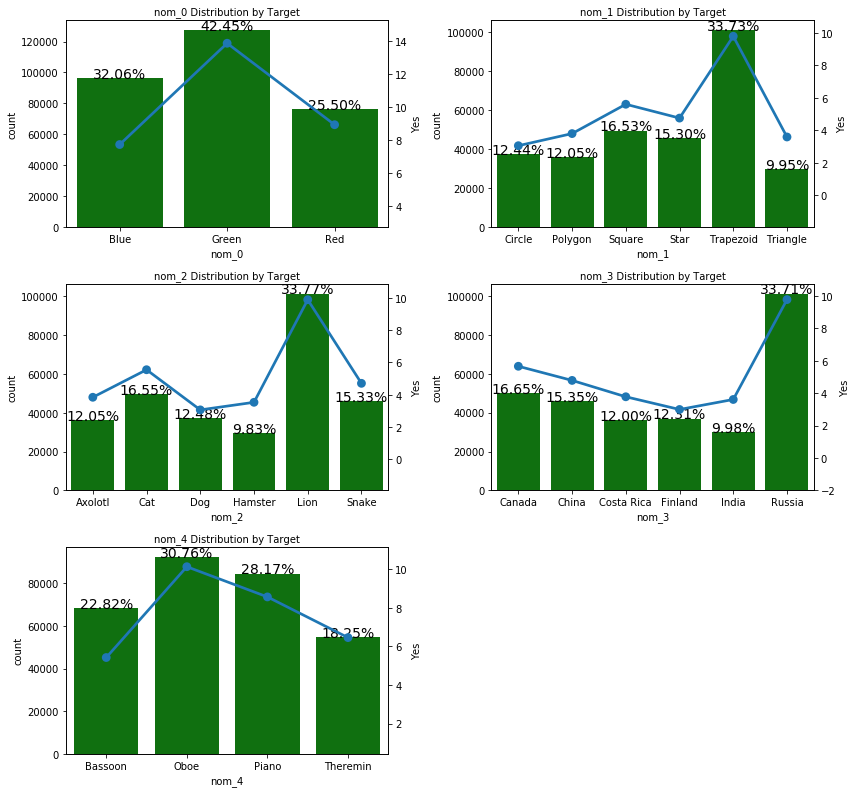

In [14]:
#let's see the number of unique values for each nominal column
list_noms = list(df_train.columns[6:16])
list_noms_few_unique=[]
for nom_col in list_noms:
  if (df_train[nom_col].nunique()<15):
    list_noms_few_unique.append(nom_col)

#print(list_noms_few_unique)
#as we can see,only first 5 columns have few number of unique values. Rest of the columns have more than 200 unique values
#so lets handle the columns with few unique values first. However, before encoding let's first analyze these columns by plotting
#graphs and then we will do encoding

def plot_category_feature(df, cols, vis_row=5, vis_col=2):
  total = len(df_train)
  grid = gspec.GridSpec(vis_row,vis_col)
  plt.figure(figsize=(12,18))
  for n,col in enumerate(df_train[cols]):

    # twinX - to build a second yaxis
    tmp_df = pd.crosstab(df_train[col],df_train['target'],normalize=True)*100
    tmp_df = tmp_df.reset_index()
    tmp_df.rename(columns={0:"No",1:"Yes"},inplace=True)
    
    ax = plt.subplot(grid[n])#required for feeding the figure of grid, even though ax is not used
    sns.countplot(x=col,data = df_train,color="green",order=list(tmp_df[col].values))
    ax.set_title(f'{col} Distribution by Target', fontsize=10)
    print_percentage(ax,total)

    
    #Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables.
    ax2 = ax.twinx()# instantiate a second axes that shares the same x-axis
    ax2=sns.pointplot(x=col,y="Yes",data=tmp_df,order=list(tmp_df[col].values),legend=False)
    ax2.set_ylim(tmp_df['Yes'].min()-5,tmp_df['Yes'].max()*1.1)
    #ax2.set_ylabel("Target %True(1)", fontsize=16)
  plt.tight_layout() 
  #plt.subplots_adjust(hspace = 0.5, wspace=.3)





plot_category_feature(df_train, list_noms_few_unique, vis_row=5, vis_col=2)



In [15]:
#now that we have the idea of how the nominal values are distributed, let's do the encoding for Nominals.
#We will only encode here those nominal features which have few unique values (in the list list_noms_few_unique)
#we will do One Hot Encoding. OHE can be done either using SKLearn or Panda's get_dummies.
#here let's use SKLearn
print("Shape before One Hot Encoding = {}".format(df_train.shape))
print(f"Shape before One Hot Encoding = {df_train.shape}")
ohc = OneHotEncoder(sparse=False)

onehot_encoded_non_sparse_matrix_train = ohc.fit_transform(df_train[list_noms_few_unique])
onehot_encoded_non_sparse_matrix_test = ohc.fit_transform(df_test[list_noms_few_unique])

#convert the non sparse matrix to dataframe and also provide the column headers.
#we can get the column header from: ohc.categories_.
encoded_cols_name = []
for catg in ohc.categories_:
  for column in catg:
    encoded_cols_name.append("nom_"+column)

df_one_hot_encoded_train = pd.DataFrame(onehot_encoded_non_sparse_matrix_train,columns=encoded_cols_name)
df_one_hot_encoded_test = pd.DataFrame(onehot_encoded_non_sparse_matrix_test,columns=encoded_cols_name)

# One-hot encoding removes the index; so put it back. if the index are labeled 0,1,2...then not required, but is a good practice
df_one_hot_encoded_train.index = df_train.index
df_one_hot_encoded_test.index = df_test.index



#let's remove those categorical column from training data frame which were just encoded. These dropped column will be replaced by the newly created 
#encoded columns
df_dropped_cat_column_train = df_train.drop(columns=list_noms_few_unique,axis=1)
df_dropped_cat_column_test = df_test.drop(columns=list_noms_few_unique,axis=1)

#concate the newly created encoded dataframe to the traiing set
df_OH_train = pd.concat([df_dropped_cat_column_train,df_one_hot_encoded_train.astype(int)],axis=1)
df_OH_test = pd.concat([df_dropped_cat_column_test,df_one_hot_encoded_test.astype(int)],axis=1)

print(f"Shape after One Hot Encoding = {df_OH_train.shape}")




Shape before One Hot Encoding = (300000, 25)
Shape before One Hot Encoding = (300000, 25)
Shape after One Hot Encoding = (300000, 45)


In [16]:
df_OH_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_Blue,nom_Green,nom_Red,nom_Circle,nom_Polygon,nom_Square,nom_Star,nom_Trapezoid,nom_Triangle,nom_Axolotl,nom_Cat,nom_Dog,nom_Hamster,nom_Lion,nom_Snake,nom_Canada,nom_China,nom_Costa Rica,nom_Finland,nom_India,nom_Russia,nom_Bassoon,nom_Oboe,nom_Piano,nom_Theremin
0,0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [17]:
df_OH_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,nom_Blue,nom_Green,nom_Red,nom_Circle,nom_Polygon,nom_Square,nom_Star,nom_Trapezoid,nom_Triangle,nom_Axolotl,nom_Cat,nom_Dog,nom_Hamster,nom_Lion,nom_Snake,nom_Canada,nom_China,nom_Costa Rica,nom_Finland,nom_India,nom_Russia,nom_Bassoon,nom_Oboe,nom_Piano,nom_Theremin
0,300000,0,0,1,1,1,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,300001,0,0,0,1,0,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,300002,1,0,1,0,1,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,300003,0,0,1,1,1,c5725677e,a6542cec0,30c63bd0c,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,300004,0,1,1,0,0,e70a6270d,97b6a3518,a42386065,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


**3.Analysis and Encoding of Ordinal categoricals (Less than 15 Features)**

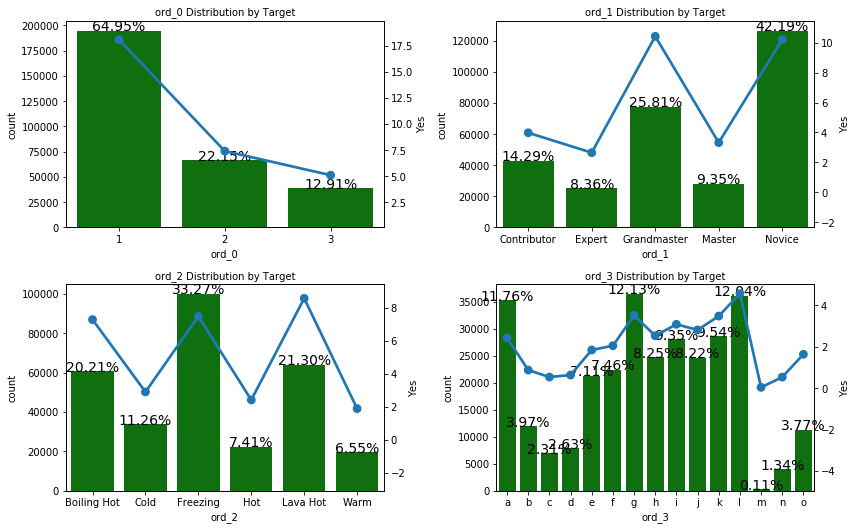

In [18]:
#we could have done something like "list_noms_few_unique"
#But since we already know the idea, I am just hardcoding the Ordinal categoricals
list_ord_few_unique = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_category_feature(df_train,list_ord_few_unique,vis_row=5, vis_col=2)

In [0]:
#TODO: plot graphs for ord_4 and ord_5

In [20]:
#let's now do Oridnal Encoding. We could use OrdinalEncoder from sklearn but then we will have no control over the numerical value
#we want to provide to the categories. For e.g. we would like to provide 
#Novice=0, Contributor=1,Expert=2 etc... so that Novice<Contributor<Expert... order is preserved.
#for exploiting this order, we will use CategoricalDtype.
#let's handle "ord_5 later as it has high cardinality"

#step1: prepare for ordering
ord_1 = CategoricalDtype(categories=['Novice', 'Contributor','Expert','Master', 'Grandmaster'], ordered=True)
ord_2 = CategoricalDtype(categories=['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'], ordered=True)
ord_3 = CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'], ordered=True)
ord_4 = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
                                     'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], ordered=True)
#step2: do the ordering
df_OH_train["ord_1"] = df_OH_train["ord_1"].astype(ord_1)
df_OH_train["ord_2"] = df_OH_train["ord_2"].astype(ord_2)
df_OH_train["ord_3"] = df_OH_train["ord_3"].astype(ord_3)
df_OH_train["ord_4"] = df_OH_train["ord_4"].astype(ord_4)

#do similarly for test set
df_OH_test["ord_1"] = df_OH_test["ord_1"].astype(ord_1)
df_OH_test["ord_2"] = df_OH_test["ord_2"].astype(ord_2)
df_OH_test["ord_3"] = df_OH_test["ord_3"].astype(ord_3)
df_OH_test["ord_4"] = df_OH_test["ord_4"].astype(ord_4)


print(df_OH_train["ord_2"].head())
print(df_OH_test["ord_2"].head())
print("#####################################################################")
#the above print statements show that the categories are now ordered the way we want it to be
#however, the encoding has not yet been done in the dataset, as can be seen in the print below 
print(df_OH_train.head())

#step3:let's do the encoding 
df_OH_train["ord_1"] = df_OH_train["ord_1"].cat.codes
df_OH_train["ord_2"] = df_OH_train["ord_2"].cat.codes
df_OH_train["ord_3"] = df_OH_train["ord_3"].cat.codes
df_OH_train["ord_4"] = df_OH_train["ord_4"].cat.codes

df_OH_test["ord_1"] = df_OH_test["ord_1"].cat.codes
df_OH_test["ord_2"] = df_OH_test["ord_2"].cat.codes
df_OH_test["ord_3"] = df_OH_test["ord_3"].cat.codes
df_OH_test["ord_4"] = df_OH_test["ord_4"].cat.codes



0           Cold
1            Hot
2       Lava Hot
3    Boiling Hot
4       Freezing
Name: ord_2, dtype: category
Categories (6, object): [Freezing < Cold < Warm < Hot < Boiling Hot < Lava Hot]
0        Warm
1    Lava Hot
2    Freezing
3    Lava Hot
4    Lava Hot
Name: ord_2, dtype: category
Categories (6, object): [Freezing < Cold < Warm < Hot < Boiling Hot < Lava Hot]
#####################################################################
   id  bin_0  bin_1  bin_2  ...  nom_Bassoon  nom_Oboe nom_Piano nom_Theremin
0   0      0      0      0  ...            1         0         0            0
1   1      0      1      0  ...            0         0         1            0
2   2      0      0      0  ...            0         0         0            1
3   3      0      1      0  ...            0         1         0            0
4   4      0      0      0  ...            0         1         0            0

[5 rows x 45 columns]


**4.Analysis and Encoding of Date categoricals**

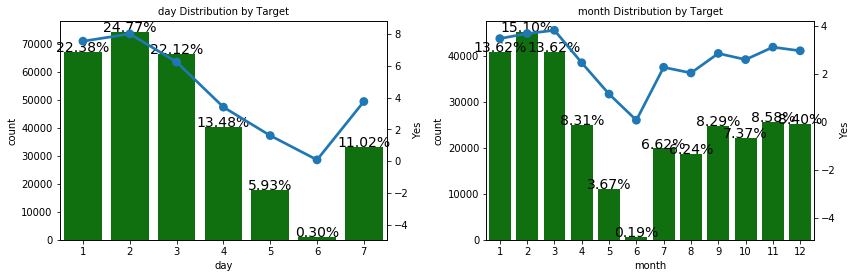

In [21]:
list_date_feature = ["day","month"]
plot_category_feature(df_train,list_date_feature,vis_row=5, vis_col=2)

In [0]:
# Transfer the cyclical features (like date-time) into two dimensional sin-cos features.
#there could be other ways to encode the date-time features too
def date_time_encoding(df,col,max_vals):
   df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_vals)
   df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_vals)
   return df


df_date_encoded_train = date_time_encoding(df_OH_train,"day",7)
df_date_encoded_test = date_time_encoding(df_OH_test,"day",7)

df_date_encoded_train = date_time_encoding(df_date_encoded_train,"month",12)
df_date_encoded_test = date_time_encoding(df_date_encoded_test,"month",12)

#note that even after encoding we have not dropped the day and month column so as to not lose some 
#additional info these column may have



In [23]:
df_date_encoded_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_Blue,nom_Green,nom_Red,nom_Circle,nom_Polygon,nom_Square,nom_Star,nom_Trapezoid,nom_Triangle,nom_Axolotl,nom_Cat,nom_Dog,nom_Hamster,nom_Lion,nom_Snake,nom_Canada,nom_China,nom_Costa Rica,nom_Finland,nom_India,nom_Russia,nom_Bassoon,nom_Oboe,nom_Piano,nom_Theremin,day_sin,day_cos,month_sin,month_cos
0,0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7,3,kr,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,9.749279e-01,-0.222521,0.866025,0.500000
1,1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0,0,bF,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,-2.449294e-16,1.000000,-0.866025,-0.500000
2,2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7,17,Jc,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-2.449294e-16,1.000000,0.866025,0.500000
3,3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,4,4,8,3,kW,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,9.749279e-01,-0.222521,0.500000,0.866025
4,4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,4,0,0,17,qP,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,-2.449294e-16,1.000000,-0.866025,-0.500000


**5.Encoding of high cardinality Ordinal Feature (ord_5)**

In [0]:
#there are many options to chose for encoding Ordinal feature with high Cardinality
#otion1: sum the letter's position for e.g. encode "bc" as 2+3=5 or "ae" as 1+5=6
df_date_encoded_train["ord_5_enc_sum"] = df_date_encoded_train["ord_5"].apply(lambda x: sum(string.ascii_letters.find(letter)+1 for letter in x ))
df_date_encoded_test["ord_5_enc_sum"] = df_date_encoded_test["ord_5"].apply(lambda x: sum(string.ascii_letters.find(letter)+1 for letter in x ))

In [0]:
#option2: join the letter's position and convert them into int. for e.g encode "bc" as 23 or "ae" as 15
df_date_encoded_train["ord_5_enc_join"] = df_date_encoded_train["ord_5"].apply(lambda x:int("".join([(str(string.ascii_letters.find(letter)+1)) for letter in x])))
df_date_encoded_test["ord_5_enc_join"] = df_date_encoded_test["ord_5"].apply(lambda x:int("".join([(str(string.ascii_letters.find(letter)+1)) for letter in x])))


In [0]:
#option3: another option could be split the string in "ord_5" such that each letter of the string goes into a new column
#this is a viable option only if the length of string in each row is managable

In [27]:
df_date_encoded_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_Blue,nom_Green,nom_Red,nom_Circle,nom_Polygon,nom_Square,nom_Star,nom_Trapezoid,nom_Triangle,nom_Axolotl,nom_Cat,nom_Dog,nom_Hamster,nom_Lion,nom_Snake,nom_Canada,nom_China,nom_Costa Rica,nom_Finland,nom_India,nom_Russia,nom_Bassoon,nom_Oboe,nom_Piano,nom_Theremin,day_sin,day_cos,month_sin,month_cos,ord_5_enc_sum,ord_5_enc_join
0,0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7,3,kr,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,9.749279e-01,-0.222521,0.866025,0.500000,29,1118
1,1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0,0,bF,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,-2.449294e-16,1.000000,-0.866025,-0.500000,34,232
2,2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7,17,Jc,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-2.449294e-16,1.000000,0.866025,0.500000,39,363
3,3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,4,4,8,3,kW,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,9.749279e-01,-0.222521,0.500000,0.866025,60,1149
4,4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,4,0,0,17,qP,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,-2.449294e-16,1.000000,-0.866025,-0.500000,59,1742


**6.Encoding of high cardinality Nominal Features (nom_5,nom_6,nom_7,nom_8,nom_9)**

In [0]:
high_card_nom_feats = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
#option1: one of the options could be to use the Hash Trick. 
for col in high_card_nom_feats:
  df_date_encoded_train[f"hash_{col}"] = df_date_encoded_train[col].apply(lambda x: hash(str(x))%5000)
  df_date_encoded_test[f"hash_{col}"] = df_date_encoded_test[col].apply(lambda x: hash(str(x))%5000)

#option2: other option could be to encode with the frequency (division by len is just to reduce the magnitude of numeric value)
for col in high_card_nom_feats:
  enc_nom_train = (df_date_encoded_train.groupby(col).size())/len(df_date_encoded_train)
  enc_nom_test = (df_date_encoded_test.groupby(col).size())/len(df_date_encoded_test)
  df_date_encoded_train[f"freq_{col}"]=df_date_encoded_train[col].apply(lambda x:enc_nom_train[x] )
  df_date_encoded_test[f"freq_{col}"]=df_date_encoded_test[col].apply(lambda x:enc_nom_test[x] )

#option3: we could even do sklearn's Label Encoding
for col in high_card_nom_feats:
  #fit_transform returns a normal 1d numpy array
  tmp_label_enc_array_train = LabelEncoder().fit_transform(df_date_encoded_train[col])
  tmp_label_enc_array_test = LabelEncoder().fit_transform(df_date_encoded_test[col])
  #Create a dataframe out of the array and add a column header
  tmp_label_enc_df_train = pd.DataFrame(tmp_label_enc_array_train,columns=[f"le_{col}"])
  tmp_label_enc_df_test = pd.DataFrame(tmp_label_enc_array_test,columns=[f"le_{col}"])
  #add the above one-column Dataframe to the original "dataframe"
  df_date_encoded_train = pd.concat([df_date_encoded_train,tmp_label_enc_df_train],axis=1)
  df_date_encoded_test = pd.concat([df_date_encoded_test,tmp_label_enc_df_test],axis=1)




In [29]:
df_date_encoded_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_Blue,nom_Green,nom_Red,nom_Circle,nom_Polygon,nom_Square,nom_Star,nom_Trapezoid,nom_Triangle,nom_Axolotl,nom_Cat,nom_Dog,nom_Hamster,nom_Lion,nom_Snake,nom_Canada,nom_China,nom_Costa Rica,nom_Finland,nom_India,nom_Russia,nom_Bassoon,nom_Oboe,nom_Piano,nom_Theremin,day_sin,day_cos,month_sin,month_cos,ord_5_enc_sum,ord_5_enc_join,hash_nom_5,hash_nom_6,hash_nom_7,hash_nom_8,hash_nom_9,freq_nom_5,freq_nom_6,freq_nom_7,freq_nom_8,freq_nom_9,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7,3,kr,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,9.749279e-01,-0.222521,0.866025,0.500000,29,1118,1462,3478,1451,1833,2607,0.008647,0.003827,0.000803,0.000903,0.000063,78,120,491,1686,2175
1,1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0,0,bF,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,-2.449294e-16,1.000000,-0.866025,-0.500000,34,232,1273,3053,2443,1189,1396,0.002640,0.002807,0.000957,0.000370,0.000043,159,510,260,650,11635
2,2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7,17,Jc,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-2.449294e-16,1.000000,0.866025,0.500000,39,363,4426,4523,84,217,3929,0.008413,0.003897,0.001583,0.000927,0.000097,44,14,766,1932,8078
3,3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,4,4,8,3,kW,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,9.749279e-01,-0.222521,0.500000,0.866025,60,1149,1209,3714,4953,3891,3483,0.003250,0.003917,0.001473,0.000677,0.000147,209,165,1121,629,6056
4,4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,4,0,0,17,qP,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,-2.449294e-16,1.000000,-0.866025,-0.500000,59,1742,4282,1493,2103,4622,2875,0.006700,0.003857,0.001453,0.000690,0.000117,90,61,34,1760,8231


**7.Clean the dataframe and retain only the columns which will be fed to the model**

In [0]:

#let's drop all the -original- and -encoded- high cardinality nominal features except the Label encoded one
#(there is no right or wrong here, just randomly keeping Label encoded feature)
drop_cols = ['ord_5','nom_5',	'nom_6','nom_7', 'nom_8',	'nom_9','hash_nom_5','hash_nom_6','hash_nom_7','hash_nom_8','hash_nom_9',
             'freq_nom_5','freq_nom_6', 'freq_nom_7', 'freq_nom_8', 'freq_nom_9']
df_date_encoded_train.drop(drop_cols,axis=1,inplace=True)
df_date_encoded_test.drop(drop_cols,axis=1,inplace=True)

In [31]:
df_date_encoded_train.head()


,id,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,nom_Blue,nom_Green,nom_Red,nom_Circle,nom_Polygon,nom_Square,nom_Star,nom_Trapezoid,nom_Triangle,nom_Axolotl,nom_Cat,nom_Dog,nom_Hamster,nom_Lion,nom_Snake,nom_Canada,nom_China,nom_Costa Rica,nom_Finland,nom_India,nom_Russia,nom_Bassoon,nom_Oboe,nom_Piano,nom_Theremin,day_sin,day_cos,month_sin,month_cos,ord_5_enc_sum,ord_5_enc_join,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,0,0,0,0,1,1,2,4,1,7,3,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,9.749279e-01,-0.222521,0.866025,0.500000,29,1118,78,120,491,1686,2175
1,1,0,1,0,1,1,1,4,3,0,0,7,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,-2.449294e-16,1.000000,-0.866025,-0.500000,34,232,159,510,260,650,11635
2,2,0,0,0,0,1,1,2,5,7,17,7,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-2.449294e-16,1.000000,0.866025,0.500000,39,363,44,14,766,1932,8078
3,3,0,1,0,0,1,1,4,4,8,3,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,9.749279e-01,-0.222521,0.500000,0.866025,60,1149,209,165,1121,629,6056
4,4,0,0,0,0,0,1,4,0,0,17,7,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,-2.449294e-16,1.000000,-0.866025,-0.500000,59,1742,90,61,34,1760,8231


**8.Let's reduce the memory usage of the Dataframe by providing an utility function**

In [32]:
def reduce_memory_usage(df,df_type,verbose="true"):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2 
  for col in df.columns:
    col_type = df[col].dtypes
    if (col_type in numerics):
      c_min = df[col].min()
      c_max = df[col].max()
      #if the first 3 character is "int"
      if (str(col_type)[:3])=='int':                
        #if the column values with in the range for int8
        if (c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max):
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64) 
      else:
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)  
    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
      print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction) for {} dataset'.format(end_mem, 100 * (start_mem - end_mem) / start_mem,df_type))
    return df

df_train = reduce_memory_usage(df_date_encoded_train,"train")
df_test = reduce_memory_usage(df_date_encoded_test,"test")
      
                  





Mem. usage decreased to 105.29 Mb (1.1% reduction) for train dataset
Mem. usage decreased to 68.66 Mb (1.1% reduction) for test dataset


**9.And now the modeling**

In [0]:
X_train = df_train.drop(["id","target"], axis=1)
y_train = df_train["target"]
X_test = df_test.drop(["id"],axis=1)


In [36]:
X_train.shape

(300000, 48)

In [0]:
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding
